# Lab Assignment 2: Regression and Classification
Please refer to the `README.md` for full laboratory instructions--part of the `README.md` is replicated below for your reference.

## Part A: Linear Regression

We are given data used in a study of the homicide rate (HOM) in Detroit, over the years 1961-1973. The following data were collected by J.C. Fisher, and used in his paper ”Homicide in Detroit: The Role of Firearms,” Criminology, vol. 14, pp. 387-400, 1976. Each row is for a year, and each column are values of a variable. A picture of the table for your reference immediately follows, but have access to the raw data in this lab.

![image](https://peilundai.com/ps2_programming/table.png)

* FTP    - Full-time police per 100,000 population
* UEMP   - % unemployed in the population
* MAN    - number of manufacturing workers in thousands
* LIC    - Number of handgun licenses per 100,000 population
* GR     - Number of handgun registrations per 100,000 population
* NMAN   - Number of non-manufacturing workers in thousands
* GOV    - Number of government workers in thousands
* HE     - Average hourly earnings
* WE     - Average weekly earnings
* HOM    - Number of homicides per 100,000 population

It turns out that three of the variables together are good predictors of the homicide rate: `FTP`, `WE`, and one more variable.

Use methods described in Chapter 3 of the textbook to devise a mathematical formulation to determine the third variable. Implement your formulation and then conduct experiments to determine the third variable. In your report, be sure to provide the step-by-step mathematical formulation (citing Chapter 3 as needed) that corresponds to the implementation you turn in. Also give plots and a rigorous argument to justify the scheme you use and your conclusions.

### Accessing the Data Set
The data is stored in a file called `detroit.npy`. `detroit.npy` has already been loaded into this environment, so you do not need to run this following cell. The command for how you can get data like this is included for your reference and edification.

You can find the data under the path:
`Assignment2/detroit.npy`.

In [37]:
# download data. 
#!wget https://peilundai.com/ps2_programming/detroit.npy

### Write and Run Your Own Code

In [38]:
#Library declarations
import matplotlib.pyplot as plt
import numpy as np

Evaluating candidate predictors from given data: 
 Candidate 'UEMP':
 β = [-7.98156958e+01  3.76695265e-01 -3.55387663e-02 -6.43074332e-01]
 MSE = 15.8219
 Candidate 'MAN':
 β = [-1.09986829e+02  3.60165290e-01 -6.13921018e-02  6.44700813e-02]
 MSE = 10.5005
 Candidate 'LIC':
 β = [-5.81244081e+01  1.84691260e-01  1.06849952e-01  1.64636819e-02]
 MSE = 3.5179
 Candidate 'GR':
 β = [-5.74412199e+01  2.02762985e-01  7.04621169e-02  1.62152012e-02]
 MSE = 6.9210
 Candidate 'NMAN':
 β = [-9.38741400e+01  2.29977228e-01 -5.74717104e-02  8.71595828e-02]
 MSE = 4.2387
 Candidate 'GOV':
 β = [-7.38479369e+01  2.04970958e-01 -2.20430680e-02  2.16965508e-01]
 MSE = 4.0685
 Candidate 'HE':
 β = [-75.11003345   0.31106152  -0.12617632   6.82966653]
 MSE = 16.3619

Best candidate predictor is:  LIC
MSE for LIC is 3.5179


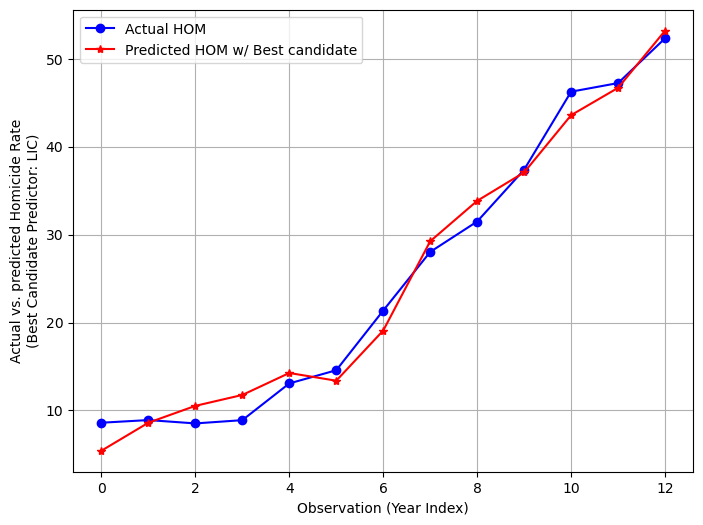

In [39]:
# load data
data=np.load('detroit.npy')

# Note: Least-squares linear regression in Python can be done with the help of np.linalg.lstsq()
'''
Column 0: FTP
Columns 1-7: Candidate Predictors: UEMP MAN LIC GR NMAN GOV HE
Column 8: WE
Column 9: HOM (output)
'''

FTP = data[:,0]
#dictionary of candidates for each candidate predictor, easier to use
candidates = {
    'UEMP': data[:, 1],
    'MAN':  data[:, 2],
    'LIC':  data[:, 3],
    'GR':   data[:, 4],
    'NMAN': data[:, 5],
    'GOV':  data[:, 6],
    'HE':   data[:, 7]
}
WE = data[:,8]
HOM = data[:,9]

#Helper functions (Rgeression & Error)

def compute_normal_eq(design_matrix, y): #Normal Equation
	#b = (X^T X)^-1 (X^T Y)
	XTX = design_matrix.T @ design_matrix #(X^T X)
	invXTX = np.linalg.inv(XTX) #(X^T X)^-1
	XTY = design_matrix.T @ y #(X^T Y)
	beta = invXTX @ XTY #b=(X^T X)^-1 (X^T Y)
	return beta

def compute_mse(y_actual, y_pred): #Mean Squared Error
	mse = np.mean((y_actual - y_pred) **2)
	return mse

#Evaluating Each Candidate Predictor
'''
For each candidate predictor, as per our design, we build a design matrix: 
The first column is all ones, or beta0, per the basix linear regression y=wx+b, where b=intercept
	The column of ones captures that intercept so we can jut work with beta
The 2nd column is FTP, or beta1; this is the first given good indicator
The 3rd column is WE, or beta2; this is the other given good indicator
The 4th column is the Candidate predictor, or beta3

Each row is [1 FTP WE X]
'''
#Dictionaries to store running data
mse_results = {}
beta_results = {} #for each candidate

print("Evaluating candidate predictors from given data: ")
for candidate_name, candidate_data in candidates.items():

	#building by columns in this command, rows in the for loop
	X_design = np.column_stack((np.ones(data.shape[0]), FTP, WE, candidate_data))
	beta = compute_normal_eq(X_design, HOM) #b=(X^T X)^-1 (X^T Y)

	#Homicide Rate X(design) times beta
	HOM_pred = X_design.dot(beta)
	mse=compute_mse(HOM, HOM_pred) #getting this candidate's MSE

	#Save to our dicitionary defined above
	mse_results[candidate_name] = mse
	beta_results[candidate_name] = beta
	print(f" Candidate '{candidate_name}':")
	print(f" β = {beta}")
	print(f" MSE = {mse:.4f}")

best_candidate = min(mse_results, key=mse_results.get)
print("\nBest candidate predictor is: ", best_candidate)
print(f"MSE for {best_candidate} is {mse_results[best_candidate]:.4f}")

#Rebuild new design matrix using the best candidate's model
best_candidate_data = candidates[best_candidate]
X_best = np.column_stack((np.ones(data.shape[0]), FTP, WE, best_candidate_data))

best_beta = beta_results[best_candidate]
HOM_pred_best = X_best.dot(best_beta)

plt.figure(figsize = (8,6))
plt.plot(range(data.shape[0]), HOM, 'bo-', label='Actual HOM')
plt.plot(range(data.shape[0]), HOM_pred_best, 'r*-', label='Predicted HOM w/ Best candidate')
plt.xlabel('Observation (Year Index)')
plt.ylabel(f'Actual vs. predicted Homicide Rate\n(Best Candidate Predictor: {best_candidate})')
plt.legend()
plt.grid(True)
plt.show()


### What to Submit
You should submit a single .pdf file that contains the following:
1. A brief post-lab write-up that contains the following for each part of this assignment:

    a. Your paper design.
    
    b. A brief description of your model. Justify your selection of model parameters.
    
    c. An evaluation of your model, including evidence as appropriate.
    
    d. A brief (couple of sentences) reflection on your take-aways from this lab exercise.